<a href="https://colab.research.google.com/github/Swarnlataaa/LinearAlgebraApplications/blob/main/SVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load an image
image_path = "path/to/your/image.jpg"
original_image = Image.open(image_path)
original_array = np.array(original_image)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(original_array, full_matrices=False)

# Choose the rank for approximation (adjust this based on your preference)
rank = 50
approximation = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))

# Display the original and approximated images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Approximated image using SVD
plt.subplot(1, 2, 2)
plt.imshow(approximation, cmap='gray')
plt.title(f'Approximation (Rank {rank})')
plt.axis('off')

plt.show()


In [2]:
import numpy as np

# Generate a sample matrix (replace this with your own data)
original_matrix = np.random.rand(6, 6)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(original_matrix, full_matrices=False)

# Choose the number of singular values to keep (adjust this based on your compression ratio)
k = 3

# Construct the compressed matrix using a subset of singular values and vectors
compressed_matrix = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Calculate the compression ratio
compression_ratio = (original_matrix.size - compressed_matrix.size) / original_matrix.size

# Display the original and compressed matrices
print("Original Matrix:")
print(original_matrix)
print("\nCompressed Matrix (Rank {}):".format(k))
print(compressed_matrix)
print("\nCompression Ratio: {:.2%}".format(compression_ratio))


Original Matrix:
[[0.167499   0.60629322 0.05818493 0.8364964  0.66077548 0.48961931]
 [0.54211635 0.1709824  0.64632819 0.28787383 0.89766929 0.49326424]
 [0.65253095 0.2831332  0.85758211 0.48221159 0.64091998 0.62342089]
 [0.2165941  0.16950818 0.48723711 0.36070468 0.09225473 0.54894156]
 [0.86427766 0.24779391 0.53913045 0.80833548 0.1536127  0.17439838]
 [0.45957087 0.16434791 0.27118233 0.1829367  0.6588017  0.94469061]]

Compressed Matrix (Rank 3):
[[0.1942173  0.59475723 0.02753696 0.83890055 0.62762277 0.52983287]
 [0.54590025 0.1850263  0.62083508 0.30129307 0.68393745 0.70937004]
 [0.73191282 0.2265697  0.77091764 0.49206529 0.63171523 0.65762324]
 [0.37264634 0.14898833 0.37490994 0.30606979 0.32544613 0.33088498]
 [0.75862155 0.28658073 0.64253159 0.81553906 0.15712532 0.14864773]
 [0.3269794  0.20776226 0.41405333 0.18260077 0.78201895 0.79170686]]

Compression Ratio: 0.00%


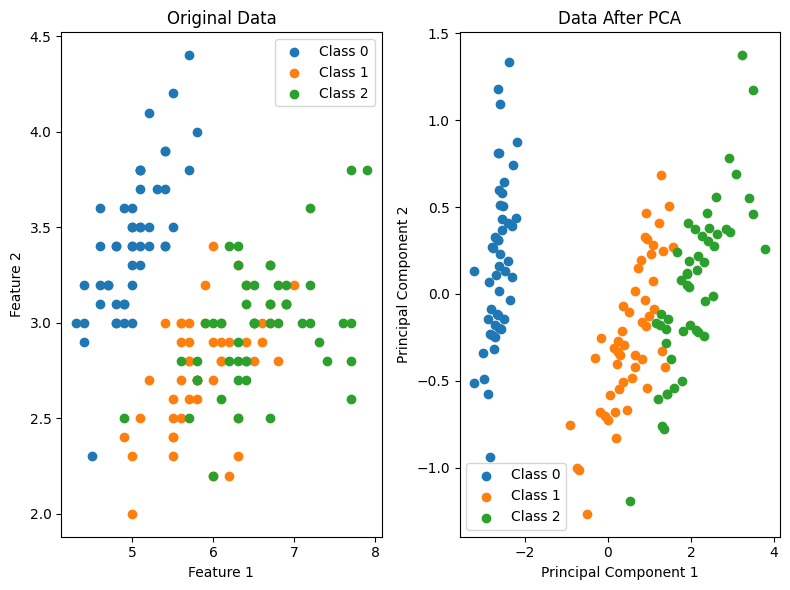

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot original data
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot data after PCA
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


TypeError: ignored

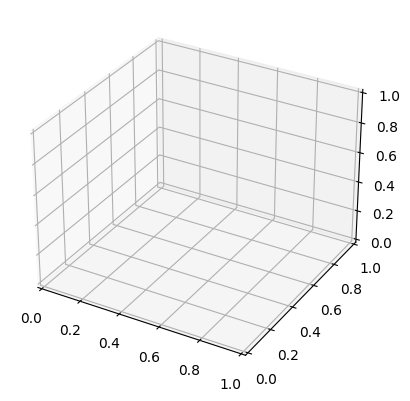

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a cube
def create_cube():
    vertices = np.array([[0, 0, 0],
                         [1, 0, 0],
                         [1, 1, 0],
                         [0, 1, 0],
                         [0, 0, 1],
                         [1, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1]])

    edges = [(0, 1), (1, 2), (2, 3), (3, 0),
             (4, 5), (5, 6), (6, 7), (7, 4),
             (0, 4), (1, 5), (2, 6), (3, 7)]

    return vertices, edges

# Function to apply linear transformations to a set of vertices
def transform(vertices, translation=None, rotation=None, scaling=None):
    if translation is not None:
        vertices += translation

    if rotation is not None:
        rotation_matrix = rotation_matrix_3d(rotation[0], rotation[1], rotation[2])
        vertices = np.dot(vertices, rotation_matrix)

    if scaling is not None:
        vertices *= scaling

    return vertices

# Function to create a 3D rotation matrix
def rotation_matrix_3d(alpha, beta, gamma):
    rotation_x = np.array([[1, 0, 0],
                           [0, np.cos(alpha), -np.sin(alpha)],
                           [0, np.sin(alpha), np.cos(alpha)]])

    rotation_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                           [0, 1, 0],
                           [-np.sin(beta), 0, np.cos(beta)]])

    rotation_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                           [np.sin(gamma), np.cos(gamma), 0],
                           [0, 0, 1]])

    return np.dot(np.dot(rotation_x, rotation_y), rotation_z)

# Function to plot the cube
def plot_cube(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for edge in edges:
        ax.plot3D(*zip(*vertices[edge]), color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Create a cube
cube_vertices, cube_edges = create_cube()

# Apply linear transformations
translation_vector = np.array([1, 2, 3])
rotation_angles = np.radians([30, 45, 60])
scaling_factors = np.array([2, 1, 0.5])

transformed_cube = transform(cube_vertices, translation=translation_vector, rotation=rotation_angles, scaling=scaling_factors)

# Plot the original and transformed cubes
plot_cube(cube_vertices, cube_edges)
plot_cube(transformed_cube, cube_edges)


In [ ]:
import numpy as np

# Substitution Box (S-Box) used in AES
S_BOX = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5,
    0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0,
    0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC,
    0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A,
    0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0,
    0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B,
    0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85,
    0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5,
    0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
])

# Key Expansion: Generates round keys from the original key
def key_expansion(key):
    # Implement key expansion here (omitted for simplicity)
    pass

# SubBytes: Applies the S-Box substitution to each byte of the state
def sub_bytes(state):
    return np.vectorize(lambda x: S_BOX[x])(state)

# ShiftRows: Permutes the bytes in the state matrix
def shift_rows(state):
    return np.roll(state, -np.arange(4), axis=0)

# MixColumns: Mixes the columns of the state matrix
def mix_columns(state):
    # Implement MixColumns transformation here (omitted for simplicity)
    pass

# AddRoundKey: XORs the state with a round key
def add_round_key(state, round_key):
    return state ^ round_key

# AES Encryption
def aes_encrypt(plaintext, key):
    # Initial round key addition
    round_keys = key_expansion(key)
    state = add_round_key(plaintext, round_keys[0])

    # Main rounds
    for round_key in round_keys[1:]:
        state = sub_bytes(state)
        state = shift_rows(state)
        state = mix_columns(state)
        state = add_round_key(state, round_key)

    # Final round (no MixColumns)
    state = sub_bytes(state)
    state = shift_rows(state)
    state = add_round_key(state, round_keys[-1])

    return state

# Example usage
plaintext = np.random.randint(256, size=(4, 4), dtype=np.uint8)
key = np.random.randint(256, size=(4, 4), dtype=np.uint8)

ciphertext = aes_encrypt(plaintext, key)

print("Plaintext:")
print(plaintext)
print("\nCiphertext:")
print(ciphertext)


hash fxn

In [6]:
import hashlib

def calculate_hash(data):
    hash_object = hashlib.sha256(data.encode())
    return hash_object.hexdigest()

# Example
original_data = "Hello, world!"
hash_value = calculate_hash(original_data)
print(f"Original Data: {original_data}")
print(f"Hash Value: {hash_value}")


Original Data: Hello, world!
Hash Value: 315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3


digi sign

In [7]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend

def generate_key_pair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    return private_key, public_key

def sign_message(private_key, message):
    signature = private_key.sign(
        message.encode(),
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    return signature

def verify_signature(public_key, message, signature):
    try:
        public_key.verify(
            signature,
            message.encode(),
            padding.PSS(
                mgf=padding.MGF1(hashes.SHA256()),
                salt_length=padding.PSS.MAX_LENGTH
            ),
            hashes.SHA256()
        )
        return True
    except Exception as e:
        return False

# Example
private_key, public_key = generate_key_pair()
message = "This is a secret message."
signature = sign_message(private_key, message)
is_valid = verify_signature(public_key, message, signature)
print(f"Message: {message}")
print(f"Signature: {signature}")
print(f"Signature is valid: {is_valid}")


Message: This is a secret message.
Signature: b"\x93x\x92 \xee\xb9\xed\x97\xf4\xbbn.1\r]\xb6\x9e\x14\x9c\x11\xeeg\xbf\xbfQ\xae\xc5fS\xe0\x95c\x93'N\xc3\xcf\xad\xcfD\x93b\xd1\x9d;\x0bO\x11\x8b`\x147\xc7\xad\x9e\xecn\xb3\x89\xf6 ASh\xac\xfe\x1c\xb4Hu\xfd\x1e\xe3\xc3S\x0c\xa6\xe4r\xbc%\xe9\xb6\x0e2w\xe9\xcd\xdf(1?\x97d&73\xcf\xd9\xd7x\x91\xbc\xcf\xbffo<`d\xe1\xfb\x9b\xba\x01\x12s\x97\r\xfb/\xd1\xe9\x17\xf0\x1d::T7\xd4\xe2\xe6\xed\x1c\x19\x94l\xd4\x00\xda\xa5\xe1\xc0\x82\xd2\x88\xe9+!\x83\xa8\xa0\xfe\xaeM\xb7\xde\xfe.\x93\xd9\x1a\x1f\xd43f\xaf\xb6P9e?I\x88\xb0\nm\xc7\xf3\xad\xe6\xbb\xca7\xa0[\x8b\\\xc5.\xde,5\x9b\xdc1\x94C\x07v\xe0\x99\x13\xa8\xb2]\xfa\x86TE\xd5\xec0M\x171OS5\xa7\x04\xc1\xaa<\x90\xf1\x06\x88\x9f\xb7}\xe2hC\xc2\xc2\xf0\x00\xcc}\x8e\xdfBU}\xcc\x8e\x88\x9b\xdfE\xe4\x1e~j"
Signature is valid: True


symm encrypt

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import base64

def encrypt_message(key, plaintext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext.encode()) + encryptor.finalize()
    return base64.b64encode(ciphertext).decode()

def decrypt_message(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()
    ciphertext = base64.b64decode(ciphertext.encode())
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext.decode()

# Example
secret_key = b'Sixteen byte key'
plaintext_message = "This is a confidential message."
encrypted_message = encrypt_message(secret_key, plaintext_message)
decrypted_message = decrypt_message(secret_key, encrypted_message)
print(f"Plaintext: {plaintext_message}")
print(f"Encrypted: {encrypted_message}")
print(f"Decrypted: {decrypted_message}")


key derivation

In [9]:
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
import os

def derive_key_from_password(password, salt):
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())
    return key

# Example
user_password = "MySecurePassword"
salt = os.urandom(16)
derived_key = derive_key_from_password(user_password, salt)
print(f"User Password: {user_password}")
print(f"Salt: {salt}")
print(f"Derived Key: {derived_key}")


User Password: MySecurePassword
Salt: b'M\xc2\x0c\xbb\x820\n\xce/_\xe4\xf0\xf1\xc09\xf3'
Derived Key: b'\xd3\x86\n\xc8#\xef\xa8\xf5\x18\xd2\x97\x12)\xe3}\xbe\xca\x01\xe9\xef;\x19\x96\xad\xaczz\xf0\xcf\x0fq\xb6'


key derevation

In [10]:
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
import os

def derive_key_from_password(password, salt):
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())
    return key

# Example
user_password = "MySecurePassword"
salt = os.urandom(16)
derived_key = derive_key_from_password(user_password, salt)
print(f"User Password: {user_password}")
print(f"Salt: {salt}")
print(f"Derived Key: {derived_key}")


User Password: MySecurePassword
Salt: b'\x97x\x83\xcc\xfeA\x80\xa9\xce\x01\x8b\x11\t\xb1g\x02'
Derived Key: b'\xcd+\x13\xad/Z\xf5\xb9%g\x11\x8eE\x7f\x8c\x1cA:\xed\xd0\x06\xfd\x01\xe6\xb4\xb1\x94\x87\xdd{\xd2p'


In [11]:
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
import os

def derive_key_from_password(password, salt):
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())
    return key

# Example
user_password = "MySecurePassword"
salt = os.urandom(16)
derived_key = derive_key_from_password(user_password, salt)
print(f"User Password: {user_password}")
print(f"Salt: {salt}")
print(f"Derived Key: {derived_key}")


User Password: MySecurePassword
Salt: b"\xc0\xa9\x95\xfaNA\x9ax\xdf'c\xbc\xb3\xe9\xfa\\"
Derived Key: b'\xf3\x10Z$bW\x92B\\\x0e\x19tt\xf9C\x16&=\ra\xa7\xabag/$G^\x96\xb3%!'
